<a href="https://colab.research.google.com/github/Gisecy/UPSO_DatosyVisualizacion/blob/main/GiselaYede_Proyecto1_PPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Importar el siguiente dataset:
https://drive.google.com/file/d/1e2Qn8mskSm6EizdAp5gPs1WIYB3mP58W/view?us
p=sharing
Presenta las ganancias de un negocio para cada mes, además de las ventas de
cada categoría de productos.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

folder = "/content/drive/MyDrive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(folder + "company_sales_data.csv") #Leo el archivo y lo guardo en formato dataframe.
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


a). Graficar las ganancias según el mes e indicar cuál fue el mes de mayor
ganancia con un punto.


In [ ]:
#Chequeo que no haya faltante de datos y veo que tipo de datos posee el df:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     bool 
 1   facecream     12 non-null     bool 
 2   facewash      12 non-null     bool 
 3   toothpaste    12 non-null     bool 
 4   bathingsoap   12 non-null     bool 
 5   shampoo       12 non-null     bool 
 6   moisturizer   12 non-null     bool 
 7   total_units   12 non-null     bool 
 8   total_profit  12 non-null     bool 
dtypes: bool(9)
memory usage: 236.0 bytes


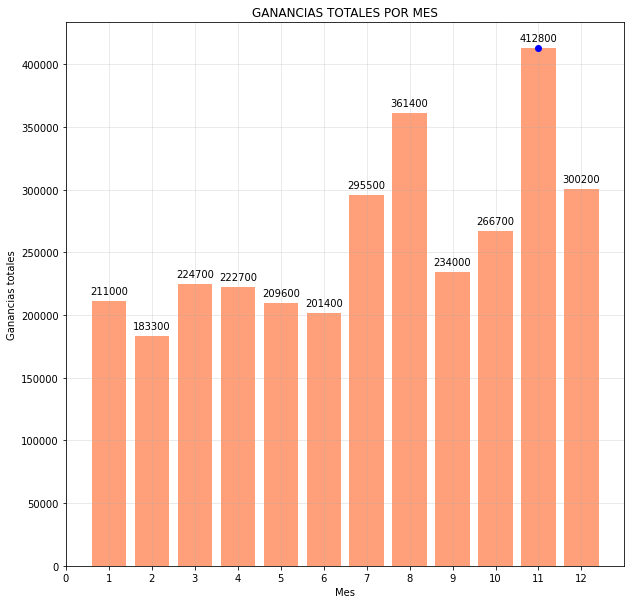

In [ ]:
#Obtengo el mes con mayor ganancia:
mayor_ganancia = df.sort_values(by='total_profit', ascending=False)
mayor_ganancia = mayor_ganancia.head(1)

#Asigno el mayor mes de ganancia a los ejes:
ejex = mayor_ganancia["month_number"]
ejey = mayor_ganancia["total_profit"]

#Asigno las columnas del dataframe al los ejes del grafico:
eje_x = df["month_number"]
eje_y = df["total_profit"]

#Creo lass figuras y los ejes:
fig, ax =plt.subplots(figsize=(10,10))
plt.grid(True, color="darkgrey")
plt.title("GANANCIAS TOTALES POR MES")
plt.xlabel('Mes')
plt.ylabel('Ganancias totales')

#Dibujo los puntos:
ax.bar(eje_x, eje_y, color= "lightsalmon")
plt.plot(ejex, ejey,marker="o",color ="b") # Dibujo el punto con mayor ganancia
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.3)
plt.xticks(range(0, 13))
for p in ax.patches: #Agrego la suma total arriba de cada barra.
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#Guardo el grafico een formato .png:
plt.savefig("Diagrama de barras verticales-Punto1.png")

#Muestro el grafico:
plt.show()

b) Graficar luego las ventas para cada categoría a lo largo del año para
visualizar si hay alguna estación en la cual un producto es más rentable.
Usar subplots para mostrar en grupo estos gráficos.


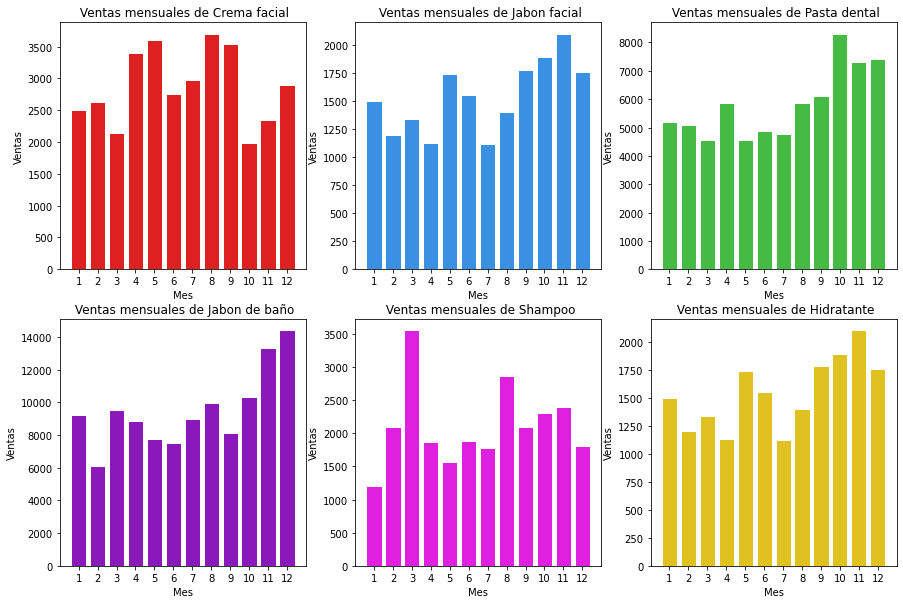

In [ ]:
#creo los subplots, como van a estar ubicados y el tamaño:

fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.set_style("darkgrid") #fondo oscuro del grid

#Asigno los valores a cada plot(en este caso tipo "barra") y su respectiva ubicacion:

sns.barplot(y="facecream", x= "month_number", data=df, ax=axes[0,0] ,color="red")
sns.barplot(y="facewash", x= "month_number", data=df, ax=axes[0,1], color="dodgerblue")
sns.barplot(y="toothpaste", x= "month_number", data=df, ax=axes[0,2], color="limegreen")
sns.barplot(y="bathingsoap", x= "month_number", data=df, ax=axes[1,0], color="darkviolet")
sns.barplot(y="shampoo", x= "month_number", data=df, ax=axes[1,1] ,color="fuchsia")
sns.barplot(y="moisturizer", x= "month_number", data=df, ax=axes[1,2], color="gold")

#Seteos personales de cada plot:
axes[0,0].set_xlabel( "Mes" , size = 10 )
axes[0,0].set_ylabel( "Ventas" , size = 10 )
axes[0,0].set_xlim(-1,12)
axes[0,0].set_title(" Ventas mensuales de Crema facial")

axes[0,1].set_xlabel( "Mes" , size = 10 )
axes[0,1].set_ylabel( "Ventas" , size = 10 )
axes[0,1].set_xlim(-1,12)
axes[0,1].set_title(" Ventas mensuales de Jabon facial")

axes[0,2].set_xlabel( "Mes" , size = 10 )
axes[0,2].set_ylabel( "Ventas" , size = 10 )
axes[0,2].set_xlim(-1,12)
axes[0,2].set_title(" Ventas mensuales de Pasta dental")

axes[1,0].set_xlabel( "Mes" , size = 10 )
axes[1,0].set_ylabel( "Ventas" , size = 10 )
axes[1,0].set_xlim(-1,12)
axes[1,0].set_title(" Ventas mensuales de Jabon de baño")

axes[1,1].set_xlabel( "Mes" , size = 10 )
axes[1,1].set_ylabel( "Ventas" , size = 10 )
axes[1,1].set_xlim(-1,12)
axes[1,1].set_title(" Ventas mensuales de Shampoo")

axes[1,2].set_xlabel( "Mes" , size = 10 )
axes[1,2].set_ylabel( "Ventas" , size = 10 )
axes[1,2].set_xlim(-1,12)
axes[1,2].set_title(" Ventas mensuales de Hidratante")

plt.show()

2) Para el dataset del ejercicio 1, sumar todas las ventas para cada producto durante el
año. Luego hacer un gráfico de torta mostrando el porcentaje de ventas de cada
categoría respecto al total.


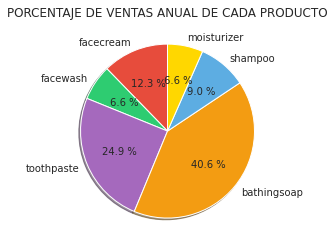

In [ ]:
#agrego los productos a una lista:
cols_a_sumar = ["facecream", "facewash", "toothpaste", "bathingsoap", "shampoo", "moisturizer"]

#sumo el total de cada producto durante el año y seteo al indice como producto:
df1 = pd.DataFrame(df[cols_a_sumar].sum())
df1.columns =["ventas"]
df1 = df1.rename_axis("producto").reset_index()

#Titulos y seteo de colores:
plt.title("PORCENTAJE DE VENTAS ANUAL DE CADA PRODUCTO")
colores = ["#e74c3c","#2ecc71","#a569bd","#f39c12","#5dade2","#FFD700"]

#Dibujo el pie con sus porcentajes:
plt.pie(df1["ventas"], labels=df1["producto"], autopct="%0.1f %%", startangle= 90,colors= colores, shadow=True)
plt.show()

3) Descargar el siguiente dataset:
https://drive.google.com/file/d/1F8pwUJBAP32ZmUDN5wY-tkF1Ds3aAm8M/view?us
p=sharing
Este contiene información sobre la vacunación cada 100 personas en países
alrededor del mundo desde diciembre de 2020.

In [ ]:
df_cvac = pd.read_csv(folder + "covid-vaccination-doses-per-capita.csv")
df_cvac.head()

,Entity,Code,Day,total_vaccinations_per_hundred
0,Afghanistan,AFG,2021-02-22,0.00
1,Afghanistan,AFG,2021-02-28,0.02
2,Afghanistan,AFG,2021-03-16,0.14
3,Afghanistan,AFG,2021-04-07,0.30
4,Afghanistan,AFG,2021-04-22,0.60
5,Afghanistan,AFG,2021-05-11,1.27
6,Afghanistan,AFG,2021-05-20,1.38
7,Afghanistan,AFG,2021-05-24,1.44
8,Afghanistan,AFG,2021-05-26,1.48
9,Afghanistan,AFG,2021-05-27,1.49


In [ ]:
df_cvac.isnull().any()

Entity                            False
Code                               True
Day                               False
total_vaccinations_per_hundred    False
dtype: bool

a). Filtrar los datos que se correspondan con Argentina.


In [ ]:
datos_ar = df_cvac[df_cvac['Code'] == "ARG"]
datos_ar.head(500)

,Entity,Code,Day,total_vaccinations_per_hundred
1047,Argentina,ARG,2020-12-29,0.04
1048,Argentina,ARG,2020-12-30,0.09
1049,Argentina,ARG,2020-12-31,0.10
1050,Argentina,ARG,2021-01-01,0.10
1051,Argentina,ARG,2021-01-02,0.10
...,...,...,...,...
1523,Argentina,ARG,2022-04-19,214.61
1524,Argentina,ARG,2022-04-20,214.81
1525,Argentina,ARG,2022-04-21,215.01
1526,Argentina,ARG,2022-04-22,215.20


b). Extraer la información de fecha y vacunación, y graficar una curva que
muestre el progreso de la campaña de vacunación.

In [ ]:
#De la columna datos, obtengo el año:
datos_ar["year"] = pd.DatetimeIndex(datos_ar["Day"]).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


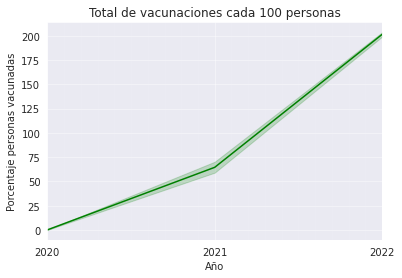

In [ ]:
#Dibujo la figura:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#Seteo los limites:
desv = np.array([2020, 2021, 2022])
x_max = np.ceil(np.max(desv) * 12) / 12
x_min = np.floor(np.min(desv) * 12) / 12

major_ticks_x = np.arange(x_min, x_max + 0.1, 1)
minor_ticks_x = np.arange(x_min, x_max + 0.1, 0.1)
ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_xlim(xmax=x_max, xmin=np.min(desv))

# Configuro el grid y los grosores de línea:
ax.grid(which="both")
ax.grid(which="minor", alpha=0.1)
ax.grid(which="major", alpha=0.5)

#Titulos y etiquetas:
plt.title("Total de vacunaciones cada 100 personas")
plt.xlabel("Año")
plt.ylabel("Porcentaje personas vacunadas")

sns.lineplot(x ="year", y="total_vaccinations_per_hundred", data=datos_ar, color="green")
plt.show()

4) Importar el dataset:
https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
En el mismo hay información sobre viviendas en Boston en 1978. Hay datos como el
precio, y otros datos de interés. Más información al respecto puede encontrarse en:
Boston Dataset (toronto.edu)
Buscaremos graficar los datos de forma que puedan apreciarse relaciones en los
mismos. Probar con distintos gráficos e identificar el que brinda mayor información.
Los datos a graficar son:

a) precio (medv) vs crimen (crim)

b) precio (medv) vs porcentaje de población con bajos ingresos (lstat)

c) precio (medv) vs impuestos (tax)

d) precio (medv) vs cantidad de maestros por alumno (ptratio)

Utilizar subplots para mostrar todos los gráficos

In [ ]:
df_boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#Chequeo que no haya faltante de informacion y ver que tipo de datos posee el df:
df_boston.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   crim     506 non-null    bool 
 1   zn       506 non-null    bool 
 2   indus    506 non-null    bool 
 3   chas     506 non-null    bool 
 4   nox      506 non-null    bool 
 5   rm       506 non-null    bool 
 6   age      506 non-null    bool 
 7   dis      506 non-null    bool 
 8   rad      506 non-null    bool 
 9   tax      506 non-null    bool 
 10  ptratio  506 non-null    bool 
 11  b        506 non-null    bool 
 12  lstat    506 non-null    bool 
 13  medv     506 non-null    bool 
dtypes: bool(14)
memory usage: 7.0 KB


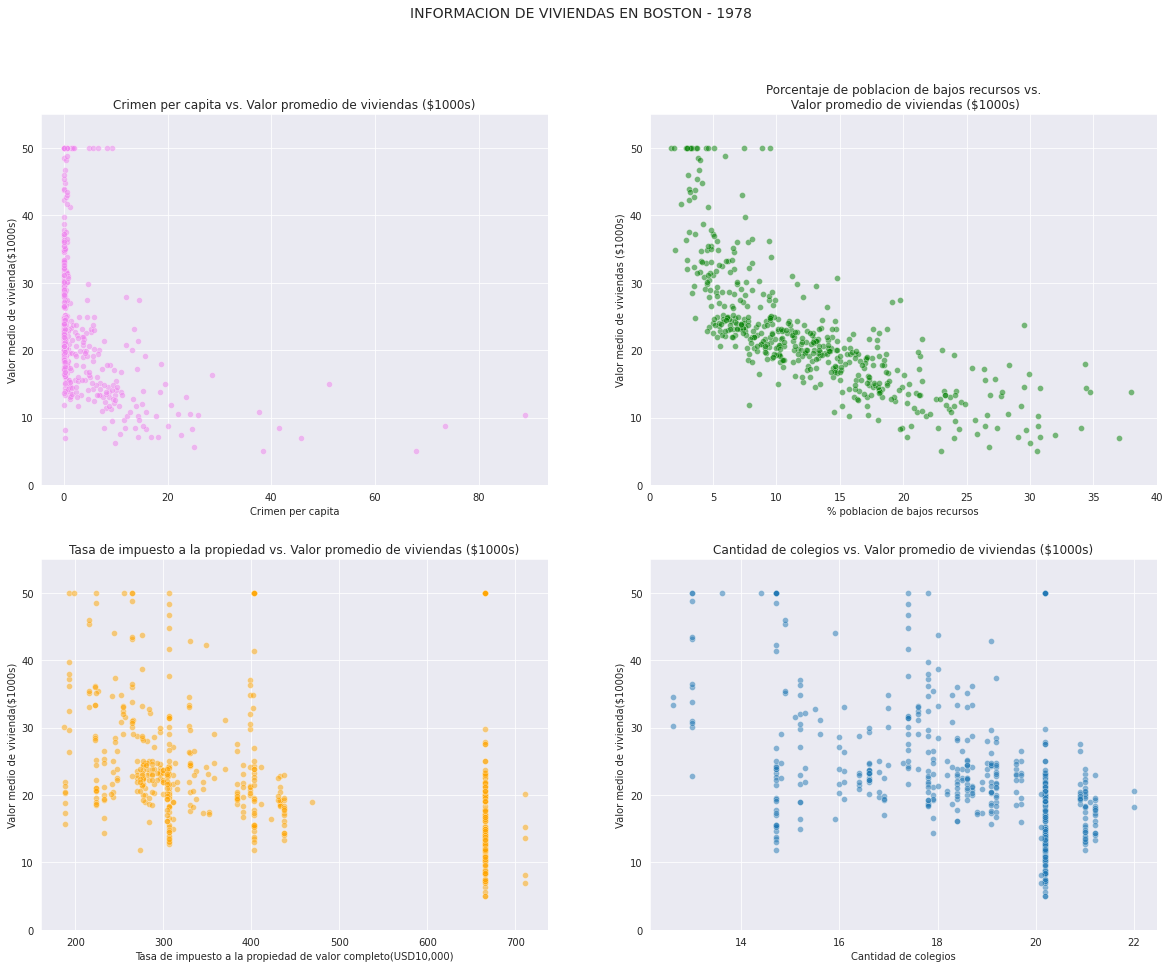

In [ ]:
#creo los subplots, como van a estar ubicados y el tamaño:

f, axes = plt.subplots(2, 2, figsize=(20,15))

#Asigno los valores a cada plot(en este caso tipo "barra") y su respectiva ubicacion:
sns.scatterplot(y="medv", x= "crim", data=df_boston,ax=axes[0,0] ,color="violet", alpha=0.5)
sns.scatterplot(y="medv", x= "lstat", data=df_boston, ax=axes[0,1], color="green", alpha=0.5)
sns.scatterplot(y="medv", x= "tax", data=df_boston, ax=axes[1,0], color="orange", alpha=0.5)
sns.scatterplot(y="medv", x= "ptratio", data=df_boston, ax=axes[1,1], alpha=0.5)

#Seteos personalizados de cada plot:
axes[0,0].set_xlabel( "Crimen per capita" , size = 10 )  #Titulo x
axes[0,0].set_ylabel( "Valor medio de vivienda($1000s)" , size = 10 ) #Titulo y
axes[0,0].set_ylim(0,55) #limite y
axes[0,0].set_title("Crimen per capita vs. Valor promedio de viviendas ($1000s)", size=12) #titulo del plot

axes[0,1].set_xlabel( "% poblacion de bajos recursos" , size = 10 )
axes[0,1].set_ylabel( "Valor medio de viviendas ($1000s)" , size = 10 )
axes[0,1].set_xlim(0,40)
axes[0,1].set_ylim(0,55)
axes[0,1].set_title("Porcentaje de poblacion de bajos recursos vs.\n Valor promedio de viviendas ($1000s)", size=12)

axes[1,0].set_xlabel( "Tasa de impuesto a la propiedad de valor completo(USD10,000)" , size = 10 )
axes[1,0].set_ylabel( "Valor medio de vivienda($1000s)" , size = 10 )
axes[1,0].set_ylim(0,55)
axes[1,0].set_title("Tasa de impuesto a la propiedad vs. Valor promedio de viviendas ($1000s)", size=12)

axes[1,1].set_xlabel( "Cantidad de colegios" , size = 10 )
axes[1,1].set_ylabel( "Valor medio de vivienda($1000s)" , size = 10 )
axes[1,1].set_ylim(0,55)
axes[1,1].set_title("Cantidad de colegios vs. Valor promedio de viviendas ($1000s)", size = 12)

plt.suptitle("INFORMACION DE VIVIENDAS EN BOSTON - 1978", size=14) #Titulo general
plt.show()

5) La siguiente carpeta:
https://drive.google.com/drive/folders/1o8QVBnmW1ZrpbkWnaKvDyjxgNjPkDBqr?us
p=sharing contiene información sobre los mundiales de fútbol desde 1930 hasta
2014.
El conjunto de datos WorldCups muestra toda la información sobre todas las Copas
del Mundo en la historia, WorldCupMatches muestra todos los resultados de los
partidos disputados como parte de las copas, y WorldCupPlayers los jugadores de
los diferentes equipos.


In [ ]:
df_wc= pd.read_csv(folder + "WorldCups.csv")
df_wcm= pd.read_csv(folder + "WorldCupMatches.csv")

In [ ]:
#Chequeo que no haya faltante de informacion y ver que tipo de datos posee el df:
df_wcm.isnull().any()
df_wc.isnull().any()
df_wcm = df_wcm.fillna(value=0.1) #Lleno los datos faltantes con 0.1


Year                    False
Datetime                False
Stage                   False
Stadium                 False
City                    False
Home Team Name          False
Home Team Goals         False
Away Team Goals         False
Away Team Name          False
Win conditions          False
Attendance              False
Half-time Home Goals    False
Half-time Away Goals    False
Referee                 False
Assistant 1             False
Assistant 2             False
RoundID                 False
MatchID                 False
Home Team Initials      False
Away Team Initials      False
dtype: bool

a) Mostrar en un gráfico los países que ganaron cada mundial y el número total
de goles que hizo.


In [ ]:
#Este ejercicio me costo muchisimo, esta fue la unica forma que pude recuperar la informacion pedida, mas alla que hay mucho faltante de datos en el df.

df_GolPaisH = df_wcm.groupby(["Home Team Name", "Year"])[["Home Team Goals"]].sum() # Agrupo por equipo local y año, sumo los goles de local.
df_GolPaisH = df_GolPaisH.reset_index("Home Team Name") # Reseteo el indice
df_GolPaisH.rename(columns={"Home Team Name":"Pais","Home Team Goals":"Goles"}, inplace=True) # Renombro las columnas a Pais y Goles.

df_GolPaisA = df_wcm.groupby(["Away Team Name", "Year"])[["Away Team Goals"]].sum() # Agrupo equipo visitante y año, sumo los goles de visitante.
df_GolPaisA = df_GolPaisA.reset_index("Away Team Name") # Reseteo el indice
df_GolPaisA.rename(columns={"Away Team Name": "Pais","Away Team Goals":"Goles"},inplace=True) # Renombro las columnas a Pais y Goles
# En los dos DataFrames que genere anteriormente por agrupacion los renombre con los mismo nombre de columnas para porder mergear a continuacion:

df_Goles = pd.merge(df_GolPaisH, df_GolPaisA, how="outer", on=["Year","Pais"]) # Hago un merge por key "Año" y "Pais" de los dos DataFrames.
df_Goles = df_Goles.fillna(value=0.1) #Como me toma los campos con entero = 0 como NaN, lo completo con valor=0.1
df_Goles["GolesTotales"] = df_Goles["Goles_x"] + df_Goles["Goles_y"] #Sumo las dos columnas de goles locales y goles visitante para cada pais

df_Goles = df_Goles.reset_index("Year")  #Saco la columna "Year" que estaba como indice.
df_Goles.rename(columns={"Pais":"Winner"}, inplace=True) # Renombre Pais a "Winner" para poder mergear despues las columnas de igual nombre.

df_Win = df_wc.iloc[:, [0,2]]        #Creo un nuevo df con las columnas "Year" y "Winner" del df WorldCups.
df_GolW = df_Goles.iloc[:,[0,1,4]]   #Creo un nuevo df con las columnas "Year","Pais" y "GolesTotales" del df df_Goles creado desde WorldCupsMatches.

df_TGxW = pd.merge(df_Win, df_GolW, how="inner", on=["Year", "Winner"]) #Hago un merge inner con las claves "Año" y "Winner"
df_TGxW["GolesTotales"] = df_TGxW["GolesTotales"].astype(int) #Convierto a entero la columna GolesTotales (quedaron flotantes cuando complete los campos con value=0.1)
df_TGxW["Year"] = df_TGxW["Year"].astype(str) + " - " + df_TGxW["Winner"] #Junto las columnas "Year y "Winner" dentro de la columna "Year".


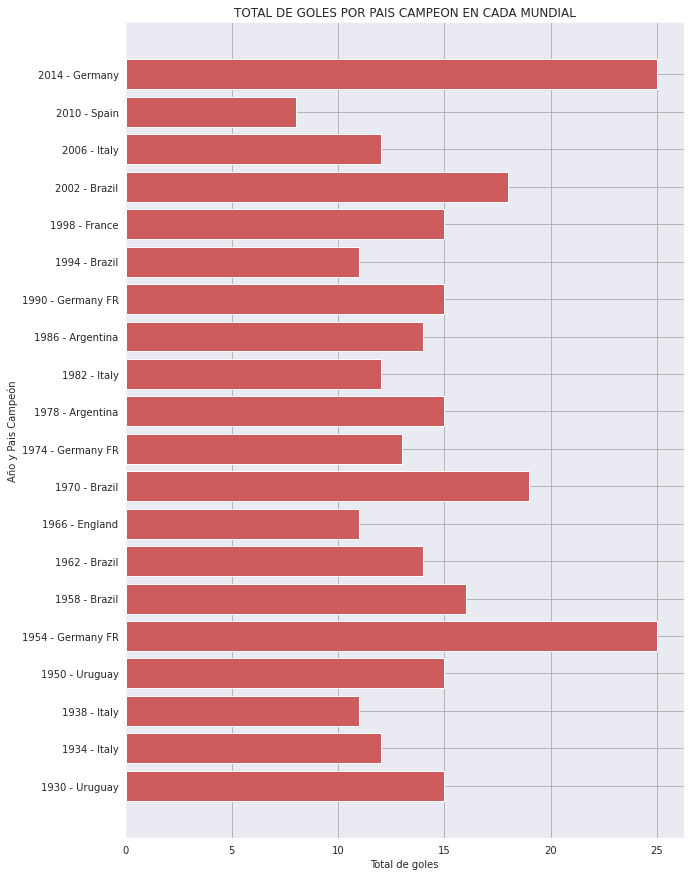

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))

ejex = df_TGxW["Year"]
ejey = df_TGxW["GolesTotales"]
plt.barh(ejex, ejey, color="indianred")
plt.grid(True, color= "darkgrey")
plt.title("TOTAL DE GOLES POR PAIS CAMPEON EN CADA MUNDIAL")
plt.xlabel("Total de goles")
plt.ylabel("Año y Pais Campeón")
plt.show()

b) Crear un sub-set de datos (dataframe) con todos los partidos que se jugaron
en la ciudad de Río de Janeiro. Con este, hacer un gráfico que muestre por
cada partido (fecha), el total de goles (sumando los goles del equipo local y el
visitante).

In [ ]:
#Guardo en un df nuevo(df_rdj) todos los partidos que se jugaron en Rio de Janeiro:
df_rdj = df_wcm[df_wcm['City'] == "Rio De Janeiro "]
df_rdj.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
53,1950.0,24 Jun 1950 - 15:00,Group 1,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,4.0,0.0,Mexico,,81649.0,1.0,0.0,READER George (ENG),GRIFFITHS Benjamin (WAL),MITCHELL George (SCO),208.0,1187.0,BRA,MEX
54,1950.0,25 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,England,2.0,0.0,Chile,,29703.0,1.0,0.0,VAN DER MEER Karel (NED),GARDELLI Mario (BRA),DAHLNER Gunnar (SWE),208.0,1192.0,ENG,CHI
60,1950.0,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2.0,0.0,Chile,,19790.0,2.0,0.0,MALCHER Alberto (BRA),MARINO Esteban (URU),ALVAREZ Alfredo (BOL),208.0,1193.0,ESP,CHI
63,1950.0,01 Jul 1950 - 15:00,Group 1,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
64,1950.0,02 Jul 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,1.0,0.0,England,,74462.0,0.0,0.0,GALEATI Giovanni (ITA),LUTZ Jean (SUI),DATTILO Generoso (ITA),208.0,1199.0,ESP,ENG


In [ ]:
#Busco el total del goles en Rio de Janeiro (sumo las columnas de goles locales y goles visitantes):
df_rdj["TotalGoles"] = df_rdj["Home Team Goals"] + df_rdj["Away Team Goals"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


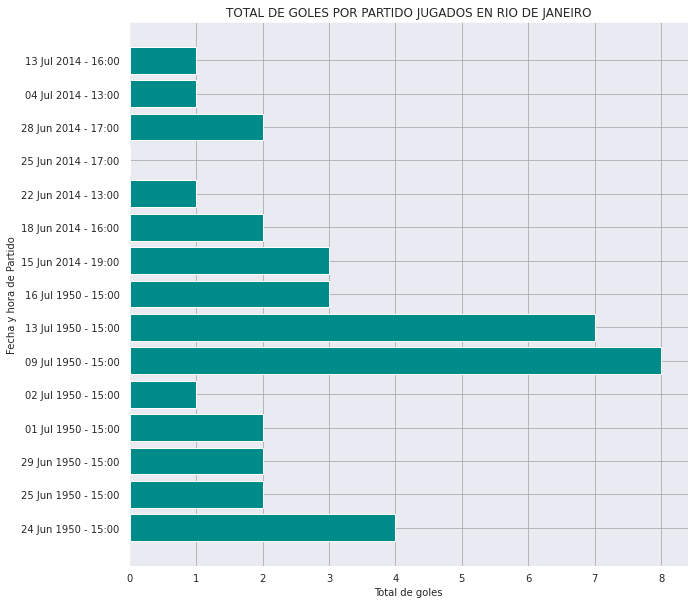

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(df_rdj["Datetime"], df_rdj["TotalGoles"], color="darkcyan")
plt.grid(True, color= "darkgrey")
plt.title("TOTAL DE GOLES POR PARTIDO JUGADOS EN RIO DE JANEIRO")
plt.xlabel("Total de goles")
plt.ylabel("Fecha y hora de Partido")
plt.show()

c) Hacer un filtro con los jugadores con el número 10 de camiseta, y de estos,
filtrar aquellos que son capitanes (Position = C).

In [ ]:
df_wcp= pd.read_csv(folder + "WorldCupPlayers.csv")
df_wcp.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,201,1095,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,NaN
196,201,1095,CHI,ORTH Gyorgy (HUN),S,0,Arturo TORRES,NaN,NaN
197,201,1095,MEX,LUQUE Juan (MEX),S,0,Roberto GAYON,NaN,NaN
198,201,1095,CHI,ORTH Gyorgy (HUN),S,0,Carlos VIDAL,NaN,G3' G65'


In [ ]:
#Chequeo que no haya faltante de informacion y ver que tipo de datos posee el df:
df_wcp.isnull().any()

RoundID          False
MatchID          False
Team Initials    False
Coach Name       False
Line-up          False
Shirt Number     False
Player Name      False
Position          True
Event             True
dtype: bool

In [ ]:
df_cdiez = df_wcp[df_wcp['Shirt Number'] == 10] # Guardo en un df solo los que tienen el numero de camiseta 10.
df_cap = df_cdiez[df_cdiez["Position"] == "C"] # De df donde estan solo los que usaron camiseta 10, filtro los que tiene la posicion de capitan.
df_cap.head(100) #Muestro el df con los dos filtros aplicados.


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
3208,211,1276,FRA,PIBAROT Pierre (FRA),S,10,Robert JONQUET,C,NaN
3217,211,1276,YUG,TIRNANIC Aleksandar (YUG),S,10,Stjepan BOBEK,C,NaN
3301,211,1294,HUN,SEBES Gusztav (HUN),S,10,Ferenc PUSKAS,C,G12' G89'
3613,211,1277,HUN,SEBES Gusztav (HUN),S,10,Ferenc PUSKAS,C,G17'
4182,3484,1278,HUN,SEBES Gusztav (HUN),S,10,Ferenc PUSKAS,C,G6'
...,...,...,...,...,...,...,...,...,...
19916,751,197,FRG,BECKENBAUER Franz (GER),S,10,Lothar MATTHAEUS,C,P25'
20003,3464,28,ARG,BILARDO Carlos (ARG),S,10,Diego MARADONA,C,NaN
20051,3464,159,FRG,BECKENBAUER Franz (GER),S,10,Lothar MATTHAEUS,C,NaN
20134,3462,27,ARG,BILARDO Carlos (ARG),S,10,Diego MARADONA,C,Y87'
